In [12]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.target[::100]
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

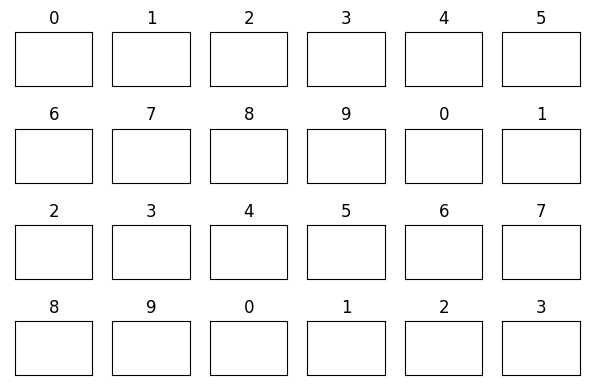

In [13]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.set_yticks([])
    axes.set_xticks([])
    axes.set_title(target)
plt.tight_layout()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20
)



#### Создание модели

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(
    algorithm='auto', leaf_size=30, metric='minkowski',
    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
    weights='uniform'
    )



KNeighborsClassifier()

### Прогнозироваени классов для рукописных цифр

In [18]:
predicted = knn.predict(X=X_test)
expected = y_test

print(predicted[0:20])
print(expected[0:20])

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(wrong)

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]
[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4)]


### Оценка точности моделей

In [19]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


#### Построение матрицы корреляций

In [20]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]], dtype=int64)

#### Отчёт по классификации